# The Sparks Foundation(Data Science & Business Analytics internship)
# Task 4:
# Exploratory Data Analysis on DataSet "Global Terrorism"

## Objective
 1. Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
 2. As a security/defense analyst, try to find out the hot zone of terrorism.
 3. What all security issues and insights you can derive by EDA?
    
## BY: AWAIS ALEEM

#  Import the Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Reading

In [2]:
dataSet = pd.read_csv("C:/Users/KHAAN/OneDrive/Desktop/Ml_DAtaSets/GlobalTerrorism(EDA).csv" , encoding= 'latin1')

C:\Users\KHAAN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataSet.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
dataSet.tail()

eventid  iyear  imonth  iday approxdate  extended resolution  \
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country  country_txt  region  ... addnotes  \
181686      182      Somalia      11  ...      NaN   
181687      200        Syria      10  ...      NaN   
181688      160  Philippines       5  ...      NaN   
181689       92        India       6  ...      NaN   
181690      160  Philippines       5  ...      NaN   

                                                   scite1  \
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
181686  START Primary Collection        0         0        0       0      NaN  
181687  START Primary Collection       -9        -9        1       1      NaN  
181688  START Primary Collection        0         0        0       0      NaN  
181689  START Primary Collection       -9        -9        0      -9      NaN  
181690  START Primary Collection       -9        -9        0      -9      NaN  

[5 rows x 135 columns]

In [5]:
dataSet.shape

(181691, 135)

# Data Cleaning

In [6]:
#Columns inside the dataset
dataSet.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# rename the columns years
dataSet.rename(columns={
    'iyear': 'Year',
    'imonth': 'Month',
    'iday': 'Day',
    'country_txt': 'Country',
    'region_txt': 'Region',
    'attacktype1_txt': 'AttackType',
    'target1': 'Target',
    'nkill': 'Killed',
    'nwound': 'Wounded',
    'summary': 'Summary',
    'gname': 'Group',
    'targtype1_txt': 'Target_type',
    'weaptype1_txt': 'Weapon_type',
    'motive': 'Motive'},
              inplace=True)

In [8]:
dataSet = dataSet[['Year' , 'Month' ,'Day' , 'Country' , 'city' , 'Region' , 'latitude' , 'longitude' , 
                  'AttackType' , 'Target', 'Killed' , 'Wounded', 'Group', 'Target_type', 'Weapon_type' ,  'Motive' , 'Summary']]

In [9]:
dataSet.head()

Year  Month  Day             Country           city  \
0  1970      7    2  Dominican Republic  Santo Domingo   
1  1970      0    0              Mexico    Mexico city   
2  1970      1    0         Philippines        Unknown   
3  1970      1    0              Greece         Athens   
4  1970      1    0               Japan        Fukouka   

                        Region   latitude   longitude  \
0  Central America & Caribbean  18.456792  -69.951164   
1                North America  19.371887  -99.086624   
2               Southeast Asia  15.478598  120.599741   
3               Western Europe  37.997490   23.762728   
4                    East Asia  33.580412  130.396361   

                       AttackType                   Target  Killed  Wounded  \
0                   Assassination             Julio Guzman     1.0      0.0   
1     Hostage Taking (Kidnapping)  Nadine Chaval, daughter     0.0      0.0   
2                   Assassination                 Employee     1.0      0.0   
3               Bombing/Explosion             U.S. Embassy     NaN      NaN   
4  Facility/Infrastructure Attack           U.S. Consulate     NaN      NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive Summary  
0     Unknown    NaN     NaN  
1     Unknown    NaN     NaN  
2     Unknown    NaN     NaN  
3  Explosives    NaN     NaN  
4  Incendiary    NaN     NaN

In [10]:
dataSet.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
city              434
Region              0
latitude         4556
longitude        4557
AttackType          0
Target            636
Killed          10313
Wounded         16311
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Summary         66129
dtype: int64

In [11]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   city         181257 non-null  object 
 5   Region       181691 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Target       181055 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Group        181691 non-null  object 
 13  Target_type  181691 non-null  object 
 14  Weapon_type  181691 non-null  object 
 15  Motive       50561 non-null   object 
 16  Summary      115562 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [12]:
dataSet.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

In [13]:
#Destructive Features
print("Country with the most Attacks" , dataSet['Country'].value_counts().idxmax())
print("City with the most Attacks" , dataSet['city'].value_counts().index[1])   #as first entry is unknown
print("Region with the most Attacks" , dataSet['Region'].value_counts().idxmax())
print("Year with the most Attacks" , dataSet['Year'].value_counts().idxmax())
print("Month with the most Attacks" , dataSet['Month'].value_counts().idxmax())
print("Group with the most Attacks" , dataSet['Group'].value_counts().index[1])
print(" Most Attack Types" , dataSet['AttackType'].value_counts().idxmax())

Country with the most Attacks Iraq
City with the most Attacks Baghdad
Region with the most Attacks Middle East & North Africa
Year with the most Attacks 2014
Month with the most Attacks 5
Group with the most Attacks Taliban
 Most Attack Types Bombing/Explosion


# Data Visualization

## 1. Number of Terrorist Activities Each year

C:\Users\KHAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


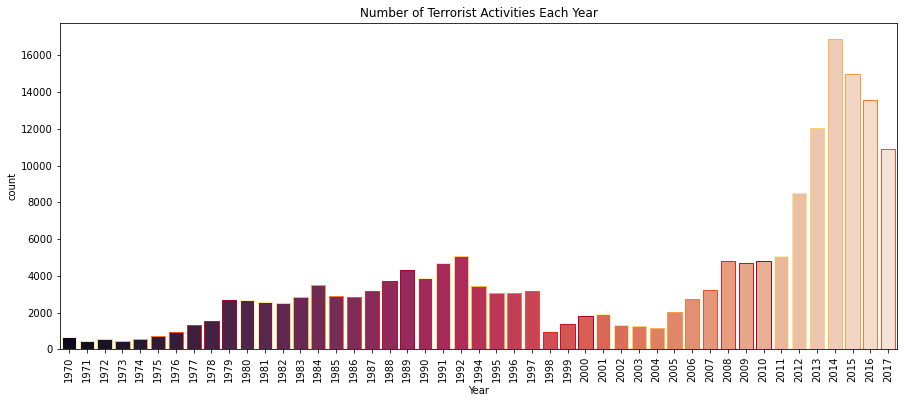

In [14]:
plt.subplots(figsize = (15, 6))
sns.countplot('Year', data=dataSet , palette='rocket' , edgecolor=sns.color_palette('YlOrRd' , 10))
plt.xticks(rotation = 90)
plt.title("Number of Terrorist Activities Each Year")
plt.show()

##### By the help of the above graph we can see that terrorist activities rapidly increase after 2005 and it was at peak in 2014 

## 2. Number of Terrorist Activities By Reagion in Each Year

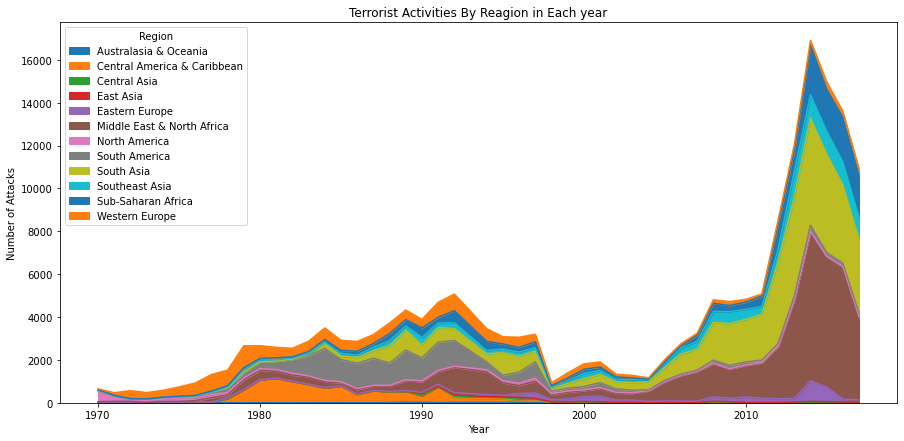

In [15]:
pd.crosstab(dataSet.Year , dataSet.Region).plot(kind = 'area' , figsize = (15 , 7))
plt.title("Terrorist Activities By Reagion in Each year")
plt.ylabel("Number of Attacks")
plt.show()

## 3. Top 10 Suffering Countries

In [16]:
dataSet['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

C:\Users\KHAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


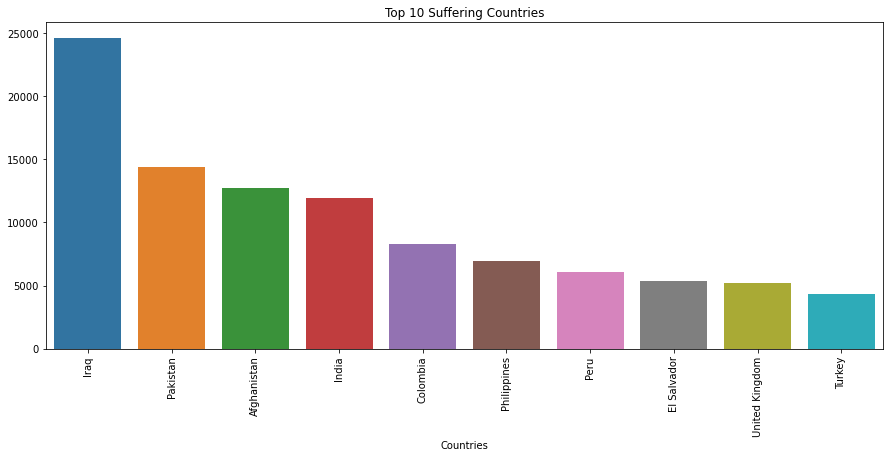

In [17]:
plt.figure(figsize = (15, 6))
x = dataSet['Country'].value_counts().values[:10]
y = dataSet['Country'].value_counts().index[:10]
sns.barplot(y,x)
plt.xlabel("Countries")
plt.xticks(rotation = 90)
plt.title("Top 10 Suffering Countries")
plt.show()

##### by the help of the above graph we can Iraq is most affected Country

## 4. Top 10 Suffering Cities

In [18]:
dataSet['city'].value_counts().head(10)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

C:\Users\KHAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


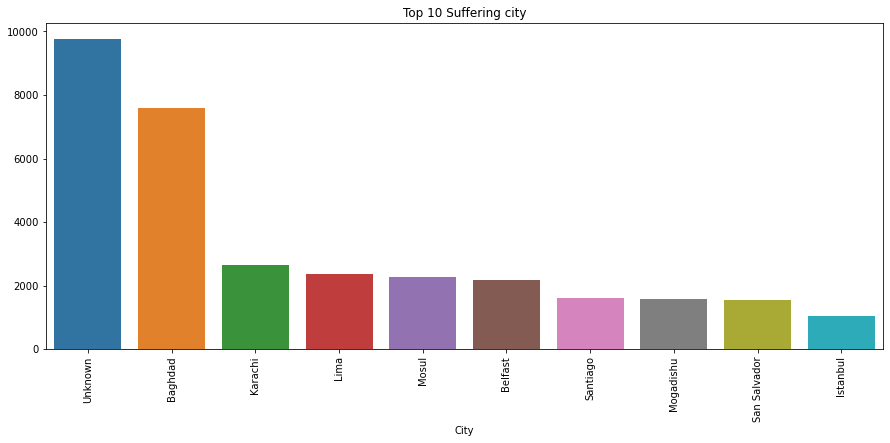

In [19]:
plt.figure(figsize = (15, 6))
x = dataSet['city'].value_counts().values[:10]
y = dataSet['city'].value_counts().index[:10]
sns.barplot(y,x)
plt.xlabel("City")
plt.xticks(rotation = 90)
plt.title("Top 10 Suffering city")
plt.show()

## 5. Top 10 Suffering Regions

In [20]:
dataSet['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

C:\Users\KHAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


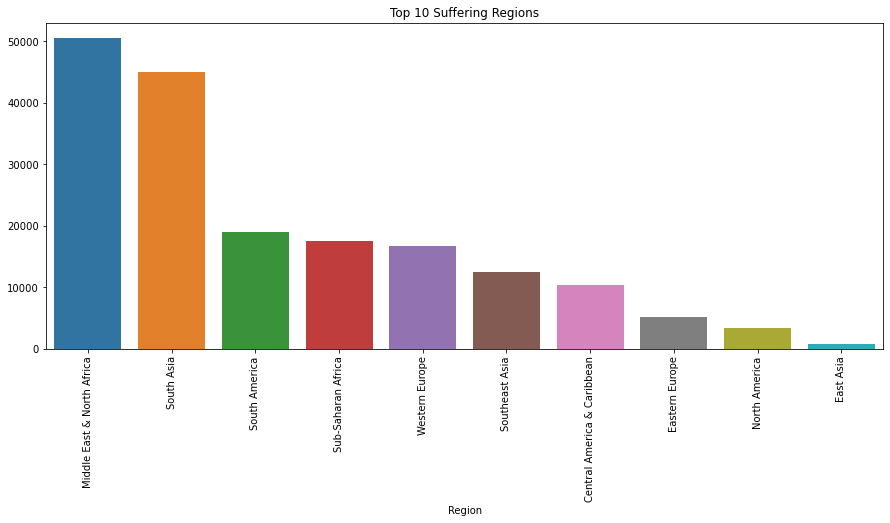

In [21]:
plt.figure(figsize = (15, 6))
x = dataSet['Region'].value_counts().values[:10]
y = dataSet['Region'].value_counts().index[:10]
sns.barplot(y,x)
plt.xlabel("Region")
plt.xticks(rotation = 90)
plt.title("Top 10 Suffering Regions")
plt.show()

##### we can See most affected region is Middle East and North Africa.

## 6. Country Wise Killing

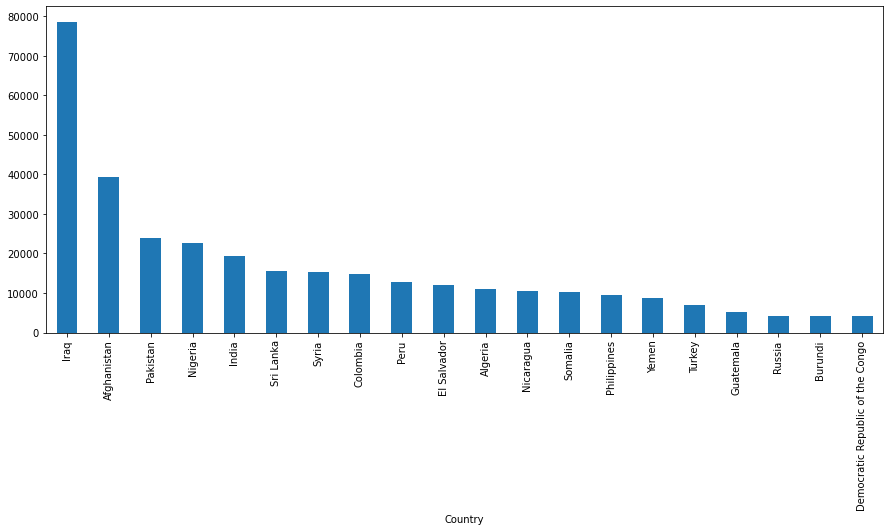

In [22]:
plt.figure(figsize = (15, 6))
dataSet.groupby('Country')['Killed'].sum().sort_values(ascending = False).head(20).plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

## 7. Region Wise Killing

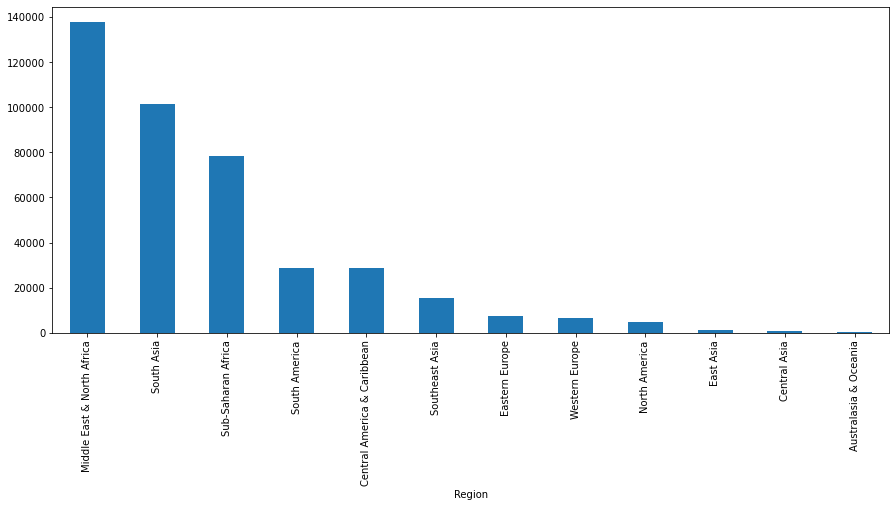

In [23]:
plt.figure(figsize = (15, 6))
dataSet.groupby('Region')['Killed'].sum().sort_values(ascending = False).head(20).plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

## 8. Terrorist Most Attack Type

C:\Users\KHAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


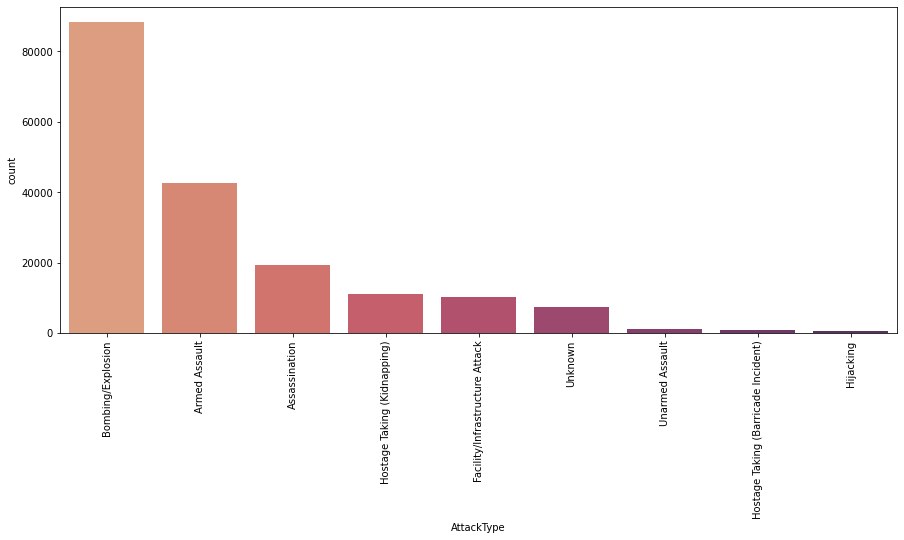

In [24]:
plt.figure(figsize = (15, 6))
sns.countplot(dataSet['AttackType'] , order= dataSet['AttackType'].value_counts().index, palette='flare')
plt.xticks(rotation = 90)
plt.show()

##### Bombing/Explosion is most Terror Attack type

## 9. Terrorist Preferable Target Type

C:\Users\KHAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


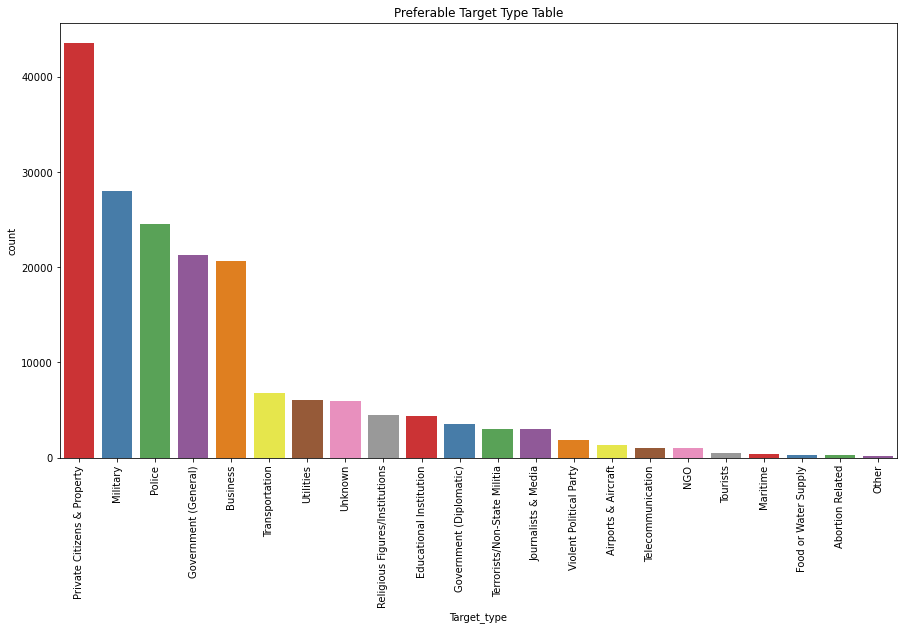

In [25]:
plt.figure(figsize = (15, 8))
sns.countplot(dataSet['Target_type'] , order= dataSet['Target_type'].value_counts().index, palette='Set1')
plt.xticks(rotation = 90)
plt.title("Preferable Target Type Table")
plt.show()

#### They Mostly Target private Citizens and property

## 10. Terriost Group with Highest Attacks

C:\Users\KHAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


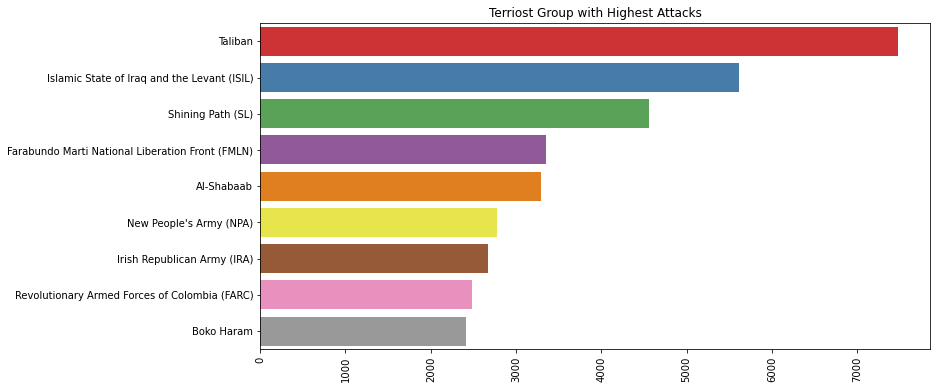

In [26]:
plt.figure(figsize = (12, 6))
sns.barplot(dataSet['Group'].value_counts()[1:10].values ,dataSet['Group'].value_counts()[1:10].index , palette='Set1' )
plt.xticks(rotation = 90)
plt.title("Terriost Group with Highest Attacks")
plt.show()

## 11. Terrorism In Pakistan

In [27]:
group_country = dataSet.groupby('Country')
pakistan = group_country.get_group('Pakistan')

### 11.1 Most Affected Cities in Pakistan

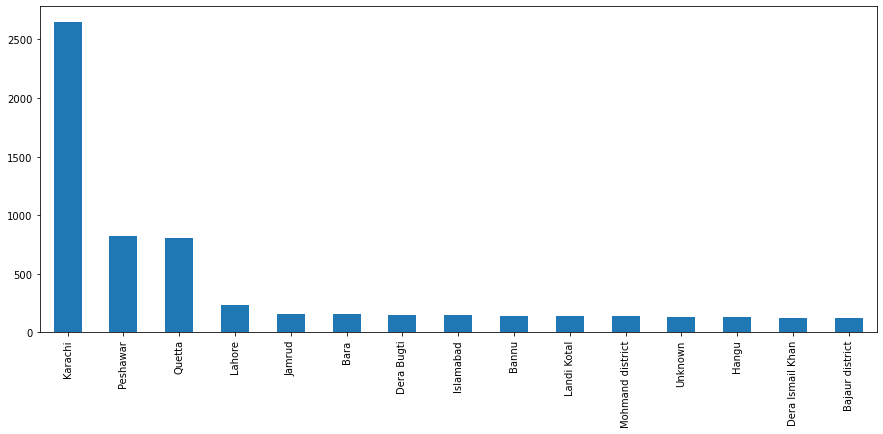

In [28]:
pakistan['city'].value_counts().nlargest(15).plot(kind = 'bar' , figsize = (15 , 6))
plt.show()

#### karachi is Most affected city in pakistan

### 11.2 Terrorist Activites Trend over the Year

C:\Users\KHAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


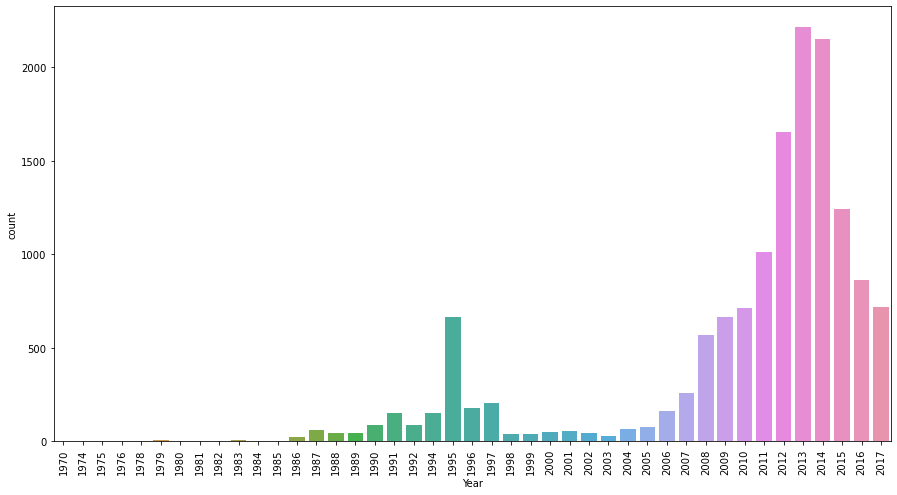

In [29]:
plt.figure(figsize = (15, 8))
sns.countplot(pakistan['Year'])
plt.xticks(rotation = 90)
plt.show()

### 11.3 Terriost Group with Highest Attacks in Pakistan

C:\Users\KHAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


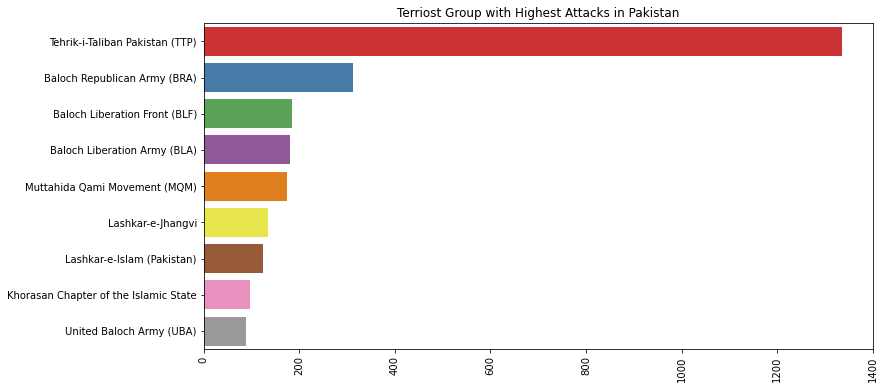

In [30]:
plt.figure(figsize = (12, 6))
sns.barplot(pakistan['Group'].value_counts()[1:10].values , pakistan['Group'].value_counts()[1:10].index , palette='Set1' )
plt.xticks(rotation = 90)
plt.title("Terriost Group with Highest Attacks in Pakistan")
plt.show()

### 11.4 Killing Trend over a Year in Pakistan

C:\Users\KHAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


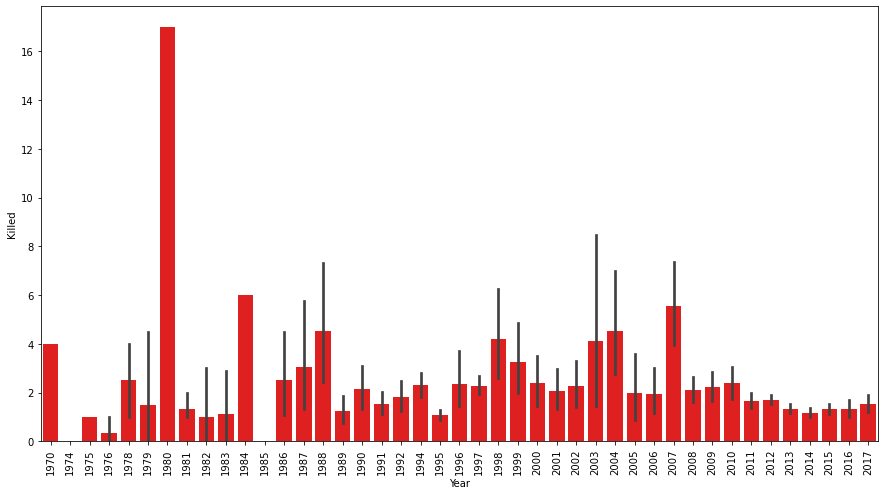

In [31]:
plt.figure(figsize = (15, 8))
sns.barplot(pakistan['Year'], pakistan['Killed'], color='red')
plt.xticks(rotation = 90)
plt.show()

### 11.5 Most Preferable Attack Types in Pakistan

C:\Users\KHAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


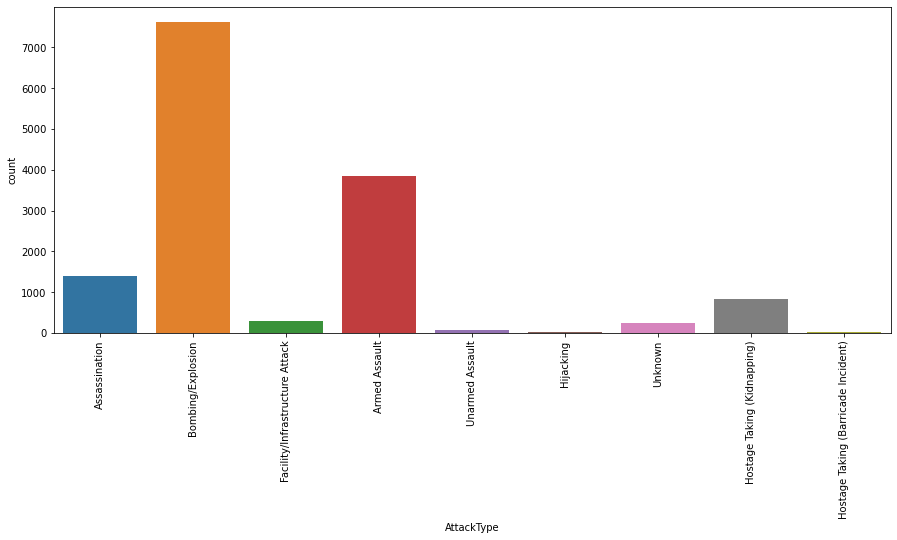

In [32]:
plt.figure(figsize = (15, 6))
sns.countplot(pakistan['AttackType'])
plt.xticks(rotation = 90)
plt.show()

# Conclusion 

1. Hot zones of Terrorism is Middle East and North Africa so all the countries should focus on these Regions. 

2. Iraq and Afganistan are most suffered countries. Government should be aware from the citizens of these countries.

3. Terrorist like to target private citizens, Army and Police Mostily. Security should be tighten in all these areas.

4. Government should tighten borders and should strick arm laws.

5. All Countries should have to make pack to tackle terrorism because after 2005 there is rapid increase in Terrorist Activites.